IRIS FLOWER CLASSIFICATION

In [5]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le=LabelEncoder()

In [6]:
#Reading dataset
df=pd.read_csv("C:/Users/khush/Desktop/datasets/IRIS.csv")

In [7]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [11]:
df.shape

(150, 5)

DATA CLEANING AND PROCESSING

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


VISUALIZING DATA

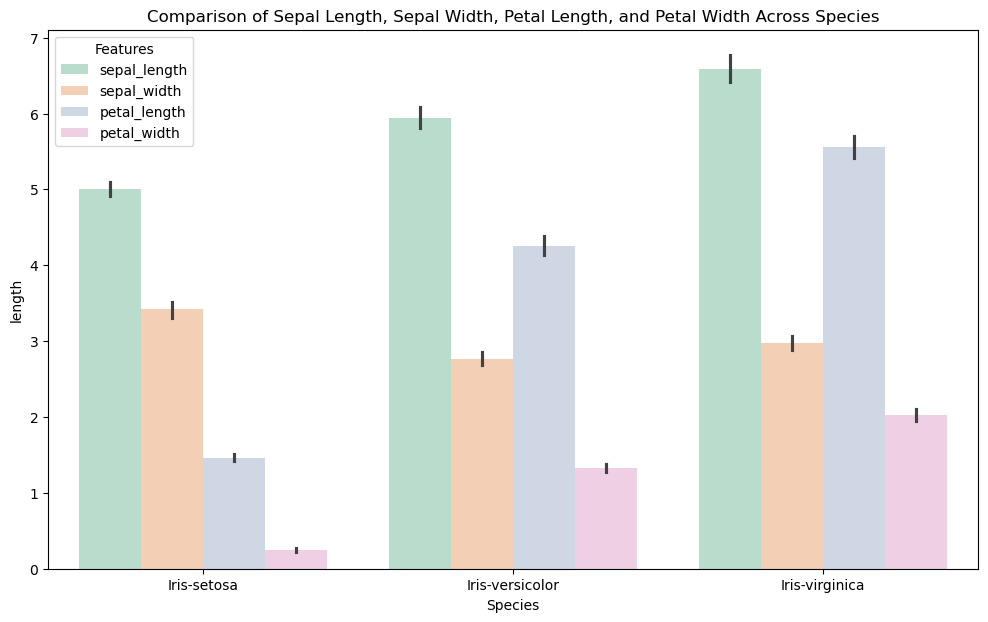

In [11]:
#Comparision of Sepal and Petal measurements
irisMelted = df.melt(id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],var_name='Iris features', value_name='length')
plt.figure(figsize=(12, 7))
sns.barplot(x='species', y='length', hue='Iris features', data=irisMelted, palette='Pastel2')
plt.title('Comparison of Sepal Length, Sepal Width, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('length')
plt.legend(title='Features')
plt.show()

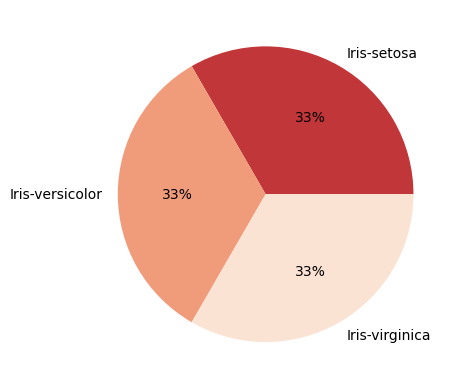

In [12]:
#pie chart for the species
color = sns.color_palette('RdBu')
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.f%%',colors=color);

MODEL TRAINING

In [14]:
#Encoding species into numeric value
for i in df.columns:
        if is_numeric_dtype(df[i]):
            continue
        else:
            df[i]=le.fit_transform(df[i])

In [15]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object

In [16]:
#Setting predictor and target values
x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

In [17]:
#Splitting dataset
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
#Building and training machine learning model
model=LinearRegression()
model.fit(x_train,y_train)
modelPredict=model.predict(x_test)

In [19]:
print('The performance evalution is given below:')
print('Mean squared error:',mean_squared_error(y_test,modelPredict))
print('Mean absolute error:',mean_absolute_error(y_test,modelPredict))
print('R2 score:',r2_score(y_test,modelPredict))

The performance evalution is given below:
Mean squared error: 0.05498404578897948
Mean absolute error: 0.19112681718501104
R2 score: 0.9082844376254666


MODEL TESTING

In [21]:
#Creating test data
testData={'sepal_length':[5.8],'sepal_width':[3.8],'petal_length':[1.6],'petal_width':[0.6]}
test=pd.DataFrame(testData)

In [22]:
#Predicting species
predictedSpecies=model.predict(test)

print("Species: ",np.round(predictedSpecies[0]).astype(int))

Species:  0
